In [4]:
import numpy as np
import os as os
from matplotlib import pyplot
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import applications
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt


Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 334.0 steps, validate for 112.0 steps
Epoch 1/20
334/334 [==============================] - 190s 570ms/step - loss: 0.6592 - accuracy: 0.6206 - val_loss: 0.5781 - val_accuracy: 0.6721
Epoch 2/20
334/334 [==============================] - 200s 598ms/step - loss: 0.5826 - accuracy: 0.6749 - val_loss: 0.5626 - val_accuracy: 0.6825
Epoch 3/20
334/334 [==============================] - 206s 616ms/step - loss: 0.5578 - accuracy: 0.6830 - val_loss: 0.5472 - val_accuracy: 0.6814
Epoch 4/20
334/334 [==============================] - 208s 622ms/step - loss: 0.5375 - accuracy: 0.6893 - val_loss: 0.5270 - val_accuracy: 0.6839
Epoch 5/20
334/334 [==============================] - 200s 600ms/step - loss: 0.5216 - accuracy: 0.7095 - val_loss: 0.4870 - val_accuracy: 0.7249
Epoch 6/20


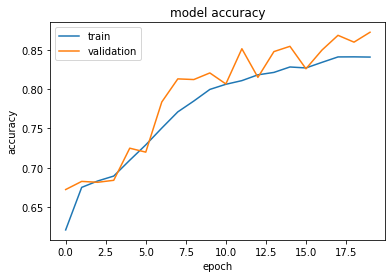

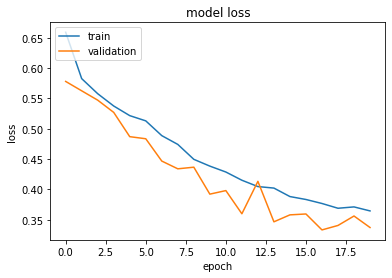

In [5]:
data_entrenamiento = './DermMel/train_sep'
data_validacion = './DermMel/valid'

"""
Parameters
"""
epocas=20
longitud, altura = 150, 150
batch_size = 32
filtrosConv1 = 32
filtrosConv2 = 64
tamano_filtro1 = (3, 3)
tamano_filtro2 = (2, 2)
tamano_pool = (2, 2)
clases = 2
lr = 0.0001

##Preparamos nuestras imagenes

entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

entrenamiento_generador = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

validacion_generador = test_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

pasos= np.ceil(entrenamiento_generador.n / batch_size)
validation_steps= np.ceil(validacion_generador.n / batch_size)

cnn = Sequential()
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(clases, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(lr=lr),
            metrics=['accuracy'])




history2=cnn.fit_generator(
    entrenamiento_generador,
    steps_per_epoch=pasos,
    epochs=epocas,
    validation_data=validacion_generador,
    validation_steps=validation_steps)

print(history2.history.keys())
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

target_dir = './baseline/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
cnn.save('./baseline/baseline.h5')
cnn.save_weights('./baseline/pesos.h5')